Solving questions from: [2022 hw - week 6](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2022/06-trees/homework.md)

# Section 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

%matplotlib inline

In [2]:
data = pd.read_csv('data/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


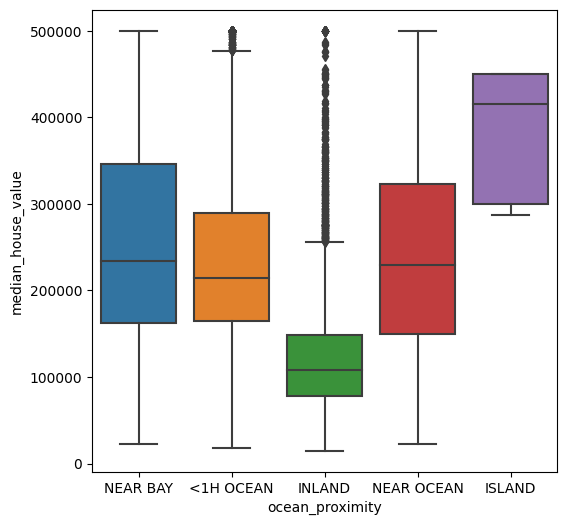

In [3]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.boxplot(data=data, x='ocean_proximity', y='median_house_value', ax=ax)
plt.show()

The boxplot above can be interpreted as showing the distribution of the `median_house_value` feature (**target variable**) for the different values that `ocean_proximity` can take. The houses on islands have the highest median `median_house_value` and houses inland have the least median `median_house_value`. The other values have roughly the same median `median_house_value`.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are _null_ values in the `total_bedrooms` feature, but not in other features.

In [5]:
data.fillna(0, inplace=True)  # replace null values with 0's
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data['median_house_value'] = np.log1p(data.median_house_value)  # applies log transformation to the target variable
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,NEAR BAY


In [8]:
# train, val, test split
fulltrain_df, test_df = train_test_split(data, test_size=0.2, random_state=1)
train_df, val_df = train_test_split(fulltrain_df, test_size=0.25, random_state=1)

X_train = train_df.copy()
y_train = X_train.pop('median_house_value').values

dv = DictVectorizer(sparse=False)  # initialises Dict Vectorizer

# converts DataFrame to dictionary and fits Dict Vectorizer
X_train = dv.fit_transform(X_train.to_dict(orient='records'))

type(X_train), type(y_train), len(y_train), len(train_df)

(numpy.ndarray, numpy.ndarray, 12384, 12384)

# Section 2

In [9]:
from tqdm import tqdm

from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

In [10]:
dtr = DecisionTreeRegressor(max_depth=1)  # initialises a Decision Tree with only one node
dtr.fit(X_train, y_train)  # fits the Decision Tree to training data

dtr

DecisionTreeRegressor(max_depth=1)

In [11]:
[*zip(dv.feature_names_, dtr.feature_importances_)]  # identifies which feature was used to split data

[('households', 0.0),
 ('housing_median_age', 0.0),
 ('latitude', 0.0),
 ('longitude', 0.0),
 ('median_income', 0.0),
 ('ocean_proximity=<1H OCEAN', 0.0),
 ('ocean_proximity=INLAND', 1.0),
 ('ocean_proximity=ISLAND', 0.0),
 ('ocean_proximity=NEAR BAY', 0.0),
 ('ocean_proximity=NEAR OCEAN', 0.0),
 ('population', 0.0),
 ('total_bedrooms', 0.0),
 ('total_rooms', 0.0)]

In [12]:
print(export_text(dtr, feature_names=dv.feature_names_))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



**Answer**: `ocean_proximity=INLAND`

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)


What's the RMSE of this model on validation?

In [13]:
rfr = RandomForestRegressor(  # initialises random forest with 10 trees
    n_estimators=10,
    random_state=1,
    n_jobs=-1
)

rfr.fit(X_train, y_train)  # fits random forest model to training data

rfr

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [14]:
# prepares validation data

X_val = val_df.copy()
y_val = X_val.pop('median_house_value').values
X_val = dv.transform(X_val.to_dict(orient='records'))

len(X_val), len(val_df), type(X_val)

(4128, 4128, numpy.ndarray)

In [15]:
y_pred = rfr.predict(X_val)  # makes predictions with trained random forest model
rmse = mean_squared_error(y_val, y_pred, squared=False)  # computes RMSE based on true and predicted y values

rmse

0.2457383433183843

**Answer**: 0.25

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?

In [16]:
n_estim = np.arange(10, 201, 10)
rmse_scores = []

for n in tqdm(n_estim):
    rfr_ = RandomForestRegressor(
        n_estimators=n,
        random_state=1,
        n_jobs=-1
    )
    
    rfr_.fit(X_train, y_train)

    y_pred_ = rfr_.predict(X_val)

    rmse_ = mean_squared_error(y_val, y_pred_, squared=False)
    rmse_scores.append(rmse_)


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:46<00:00,  2.32s/it]


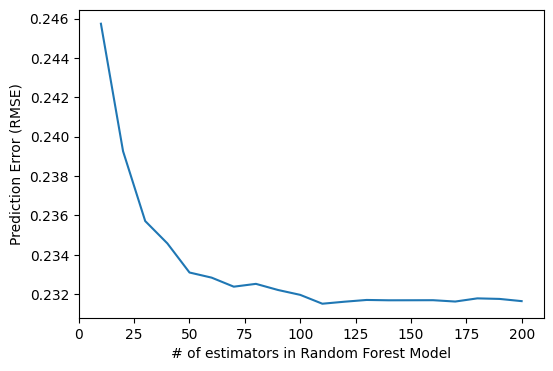

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(n_estim, rmse_scores)  # plots response in RMSE to change in # of estimators

ax.set_xlim(0, 210)
ax.set_xlabel('# of estimators in Random Forest Model')
ax.set_ylabel('Prediction Error (RMSE)')
plt.show()

**Answer**: 70

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`


What's the best `max_depth`?

In [18]:
n_estim = np.arange(10, 201, 10)
depths = [10, 15, 20, 25]
rmse_scores = []

for d in tqdm(depths):
    for n in n_estim:
        rfr_ = RandomForestRegressor(  # initialises random forest
            max_depth=d,
            n_estimators=n,
            random_state=1,
            n_jobs=-1
        )
        
        rfr_.fit(X_train, y_train)
    
        y_pred_ = rfr_.predict(X_val)
        rmse_ = mean_squared_error(y_val, y_pred_, squared=False)
        
        rmse_scores.append(dict(  # appends a dictionary to track relevant information
            depth = rfr_.max_depth,
            n_est = rfr_.n_estimators,
            rmse = rmse_
        ))


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:31<00:00, 37.86s/it]


In [19]:
rmse_df = pd.DataFrame(rmse_scores)
rmse_df.sort_values('rmse').head()

,depth,n_est,rmse
70,25,110,0.231255
71,25,120,0.231297
76,25,170,0.231440
73,25,140,0.231458
75,25,160,0.231484


**Answer**: 25

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature? 

In [20]:
rfr = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1,
)

rfr.fit(X_train, y_train)

# identifies the most important feature by finding the position where 
# the random forest model's feature_importances_ attribute is maximum
dv.feature_names_[np.argmax(rfr.feature_importances_)]


'median_income'

**Answer**: `median_income`

# Section 3

In [21]:
import xgboost as xgb

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```python
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

In [22]:
Dtrain = xgb.DMatrix(X_train, y_train)
Dval = xgb.DMatrix(X_val, y_val)

evallist = [(Dtrain, 'train'), (Dval, 'eval')]  # specifies evaluation sets to watch performance

xgb_params = {
    'eta': 0.1,  # learning rate
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',  # for regression, uses RMSE
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}


In [23]:
num_round = 100
bst = xgb.train(xgb_params, Dtrain, num_round, evals=evallist)

[0]	train-rmse:10.44372	eval-rmse:10.44933
[1]	train-rmse:9.40118	eval-rmse:9.40680
[2]	train-rmse:8.46290	eval-rmse:8.46827
[3]	train-rmse:7.61859	eval-rmse:7.62387
[4]	train-rmse:6.85878	eval-rmse:6.86363
[5]	train-rmse:6.17513	eval-rmse:6.17983
[6]	train-rmse:5.55994	eval-rmse:5.56433
[7]	train-rmse:5.00643	eval-rmse:5.01057
[8]	train-rmse:4.50846	eval-rmse:4.51254
[9]	train-rmse:4.06043	eval-rmse:4.06448
[10]	train-rmse:3.65741	eval-rmse:3.66123
[11]	train-rmse:3.29493	eval-rmse:3.29883
[12]	train-rmse:2.96895	eval-rmse:2.97269
[13]	train-rmse:2.67551	eval-rmse:2.67951
[14]	train-rmse:2.41179	eval-rmse:2.41589
[15]	train-rmse:2.17479	eval-rmse:2.17906
[16]	train-rmse:1.96172	eval-rmse:1.96607
[17]	train-rmse:1.77047	eval-rmse:1.77480
[18]	train-rmse:1.59855	eval-rmse:1.60301
[19]	train-rmse:1.44410	eval-rmse:1.44871
[20]	train-rmse:1.30574	eval-rmse:1.31081
[21]	train-rmse:1.18161	eval-rmse:1.18708
[22]	train-rmse:1.06939	eval-rmse:1.07513
[23]	train-rmse:0.96920	eval-rmse:0.97506


Validation RMSE, with `eta = 0.3` = 0.23  
Validation RMSE, with `eta = 0.1` = 0.23

**Answer**: Both lead to same